In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk
import tensorflow.keras.backend as K

In [4]:
data =pd.read_csv('/content/drive/MyDrive/News/collected_data/news_classification.csv')
data.head()

,headline,category,newspaper name
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor


In [5]:
data['category'].replace([0,1,2,3,4,5],['Amusement','IT','International','national','politics','sports'],inplace=True)
data.groupby('category').size().reset_index(name='counts')

,category,counts
0,Amusement,16491
1,IT,2806
2,International,48813
3,national,24935
4,politics,10589
5,sports,33177


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136805 entries, 0 to 136810
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   headline        136805 non-null  object
 1   category        136805 non-null  object
 2   newspaper name  136805 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


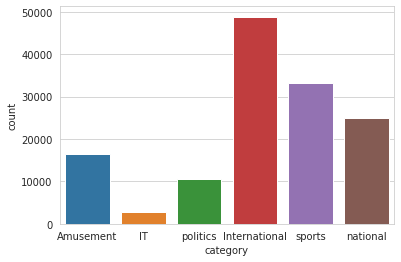

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'category', data = data)

In [10]:
def process_sentences(Sentence): 
    Sentence = re.sub('[^\u0980-\u09FF]',' ',Sentence)
    Sentence = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', Sentence)
    Sentence = re.sub(r'(\W)(?=\1)', '', Sentence)
    Sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', Sentence, flags=re.MULTILINE)
    Sentence = re.sub(r'\<a href', ' ', Sentence)
    Sentence = re.sub(r'&amp;', '', Sentence) 
    Sentence = re.sub(r'<br />', ' ', Sentence)
    Sentence = re.sub(r'\'', ' ', Sentence)
    Sentence = re.sub(r'ߑͰߑ̰ߒנ', '', Sentence)
    Sentence = re.sub(r'ߎɰߎɰߎɍ', '', Sentence)
    return Sentence

In [11]:
data['headline'] = data['headline'].apply(process_sentences)  
data

,headline,category,newspaper name
0,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,Amusement,Jugantor
1,এত দামি জুতা পরেন প্রিয়াঙ্কা,Amusement,Jugantor
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor
...,...,...,...
136806,অন্যরকম উদযাপন,national,Dainik Inqilab
136807,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,national,Dainik Inqilab
136808,রাজনীতি ছাড়তে চান,national,Dainik Inqilab
136809,বিএনপি নির্বাচনী ভীতিতে ভুগছে,national,Dainik Inqilab


In [12]:
# Remove the Text with least words
data['length'] = data['headline'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 5 Small Text 
Total Text: 136800


In [13]:
dataset

,headline,category,newspaper name,length
0,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,Amusement,Jugantor,7
1,এত দামি জুতা পরেন প্রিয়াঙ্কা,Amusement,Jugantor,5
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor,5
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor,7
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor,8
...,...,...,...,...
136795,অন্যরকম উদযাপন,national,Dainik Inqilab,2
136796,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,national,Dainik Inqilab,7
136797,রাজনীতি ছাড়তে চান,national,Dainik Inqilab,3
136798,বিএনপি নির্বাচনী ভীতিতে ভুগছে,national,Dainik Inqilab,4


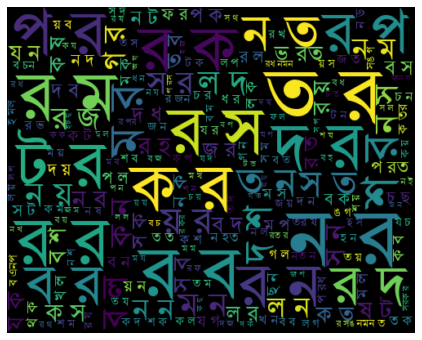

In [14]:
from wordcloud import WordCloud 
allWords = ' '.join([comnt for comnt in data['headline']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/News/collected_data/Nikosh/Nikosh.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [15]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    vocab_size = []
    total_u_words = [word.strip().lower() for t in list(dataset.headline) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].headline) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.category==label].headline)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].headline))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
    vocab_size = (len(np.unique(total_u_words)))
    
    return documents,words,u_words,class_label,vocab_size

documents,words,u_words,class_names,vocab_size = data_summary(dataset)   


Class Name :  International
Number of Documents:48812
Number of Words:299448
Number of Unique Words:28160
Most Frequent Words:

নিহত	3399
না	2133
নিয়ে	1634
ট্রাম্প	1475
মার্কিন	1434
ও	1342
থেকে	1332
ভারতের	1213
যুক্তরাষ্ট্র	1210
ভারত	1192

Class Name :  sports
Number of Documents:33169
Number of Words:154667
Number of Unique Words:18348
Most Frequent Words:

বাংলাদেশ	1613
না	1124
টিভিতে	959
জয়	895
বাংলাদেশের	883
দেখুন	849
শুরু	783
খেলা	734
নিয়ে	689
সাকিব	676

Class Name :  national
Number of Documents:24934
Number of Words:154688
Number of Unique Words:20167
Most Frequent Words:

না	1444
হবে	1292
ও	1215
প্রধানমন্ত্রী	1012
আজ	755
থেকে	617
কাদের	613
খালেদা	567
বিএনপি	558
নিয়ে	556

Class Name :  Amusement
Number of Documents:16490
Number of Words:98297
Number of Unique Words:16600
Most Frequent Words:

নতুন	1158
নিয়ে	1074
ও	1003
গান	683
ভিডিও	518
না	484
নাটক	470
খান	462
চলচ্চিত্র	416
আজ	413

Class Name :  politics
Number of Documents:10589
Number of Words:73908
Number of Unique Words:102

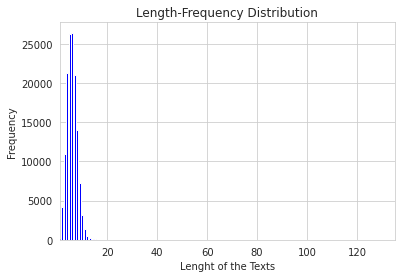

Maximum Length of a Text: 21
Minimum Length of a Text: 1
Average Length of a Text: 6.0


In [17]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.headline.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")
max_len = max(dataset.TextLength)

In [18]:
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(dataset.headline)

X = tokenizer.texts_to_sequences(dataset.headline)

print('Before Tokenization & Padding \n', dataset.headline[0])

feature = pad_sequences(X, maxlen=max_len)

print('After Tokenization & Padding \n', feature[0])

Before Tokenization & Padding 
 হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন 
After Tokenization & Padding 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  682   11 7088 2279 3345 6792  220]


In [19]:
import tensorflow
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import keras.layers as layers
from keras import regularizers
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.callbacks import History
from keras import models
from keras import losses
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [20]:
le = LabelEncoder()

labels = le.fit_transform(dataset.category)

labels = to_categorical(labels)

In [21]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(feature, labels, test_size=0.2, random_state=42)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of Train set:',X_train_emb.shape)
print('Shape of Validation set:',X_valid_emb.shape)

Shape of Train set: (109440, 21)
Shape of Validation set: (27360, 21)


In [22]:
embedding_size = 32
epochs = 10

In [24]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [26]:
def get_model():

    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, embedding_size, input_length=max_len))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    model.summary()

    model.compile(optimizer='rmsprop'
              , loss='categorical_crossentropy'
              , metrics=['accuracy', precision, recall])
    
    return model

In [27]:
model = get_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 32)            1814272   
                                                                 
 conv1d (Conv1D)             (None, 17, 128)           20608     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,836,236
Trainable params: 1,836,236
Non-trainable params: 0
______________________________________________

In [28]:
history = model.fit(X_train_emb
                    , y_train_emb
                    , epochs=epochs
                    , batch_size=64
                    , validation_data=(X_valid_emb, y_valid_emb)
                    , verbose=1)

Epoch 1/10
1710/1710 [==============================] - 30s 17ms/step - loss: 0.8940 - accuracy: 0.6660 - precision: 0.7928 - recall: 0.5042 - val_loss: 0.6061 - val_accuracy: 0.7709 - val_precision: 0.8417 - val_recall: 0.7022
Epoch 2/10
1710/1710 [==============================] - 29s 17ms/step - loss: 0.5187 - accuracy: 0.8179 - precision: 0.8622 - recall: 0.7727 - val_loss: 0.5232 - val_accuracy: 0.8121 - val_precision: 0.8537 - val_recall: 0.7736
Epoch 3/10
1710/1710 [==============================] - 32s 19ms/step - loss: 0.4234 - accuracy: 0.8548 - precision: 0.8817 - recall: 0.8250 - val_loss: 0.4931 - val_accuracy: 0.8261 - val_precision: 0.8571 - val_recall: 0.7945
Epoch 4/10
1710/1710 [==============================] - 34s 20ms/step - loss: 0.3586 - accuracy: 0.8784 - precision: 0.8964 - recall: 0.8582 - val_loss: 0.4795 - val_accuracy: 0.8335 - val_precision: 0.8565 - val_recall: 0.8099
Epoch 5/10
1710/1710 [==============================] - 28s 17ms/step - loss: 0.3113 - a

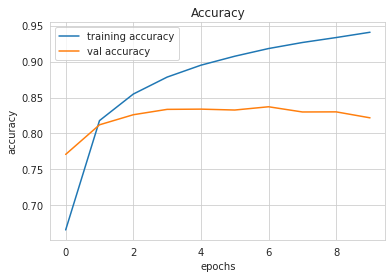

In [29]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

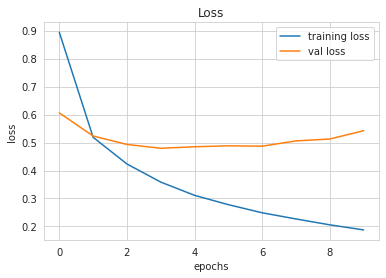

In [30]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
train_score = model.evaluate(X_train_emb, y_train_emb, verbose=0)
print('Train accuracy:', train_score[1])

Train accuracy: 0.953801155090332


In [32]:
test_score = model.evaluate(X_valid_emb, y_valid_emb, verbose=0)
print('Test accuracy:', test_score[1])

Test accuracy: 0.8217470645904541


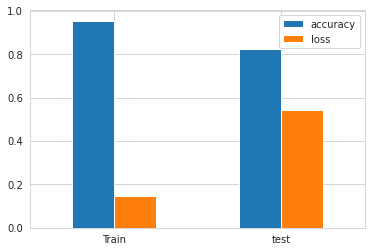

In [33]:
accuracy = [train_score[1], test_score[1]]
loss = [train_score[0], test_score[0]]
index = ['Train', 'test']
df = pd.DataFrame({'accuracy': accuracy,
                   'loss': loss}, index=index)
ax = df.plot.bar(rot=0)

In [34]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_valid_emb, y_valid_emb, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))

def f1_score(precision, recall):
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8217
Precision : 0.8405
Recall    : 0.8063
F1 Score  : 0.8230


855/855 [==============================] - 2s 2ms/step


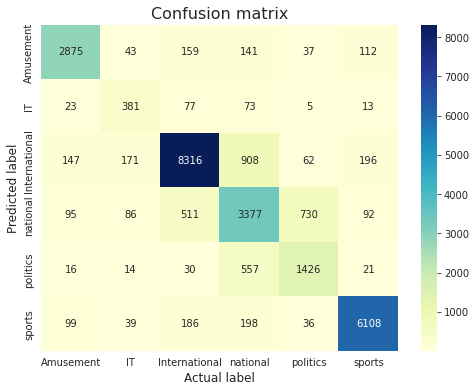

In [35]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):

    classes = ['Amusement','IT','International','national','politics','sports']

    y_pred = model.predict(X_test)

    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.YlGnBu, annot=True, fmt='d',
                xticklabels=classes,
                yticklabels=classes)
    
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_valid_emb, y_valid_emb)